In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re, string
from rouge_score import rouge_scorer

In [2]:
# Normalisierungsfunktion
def normalize_answer(ans):
    if not isinstance(ans, str):
        return ''
    ans = ans.lower()
    ans = re.sub(f"[{re.escape(string.punctuation)}]", "", ans)
    return ans.strip()

# ROUGE-L Funktion
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
def rouge_l(gt, pred):
    scores = scorer.score(gt, pred)
    return scores['rougeL'].fmeasure

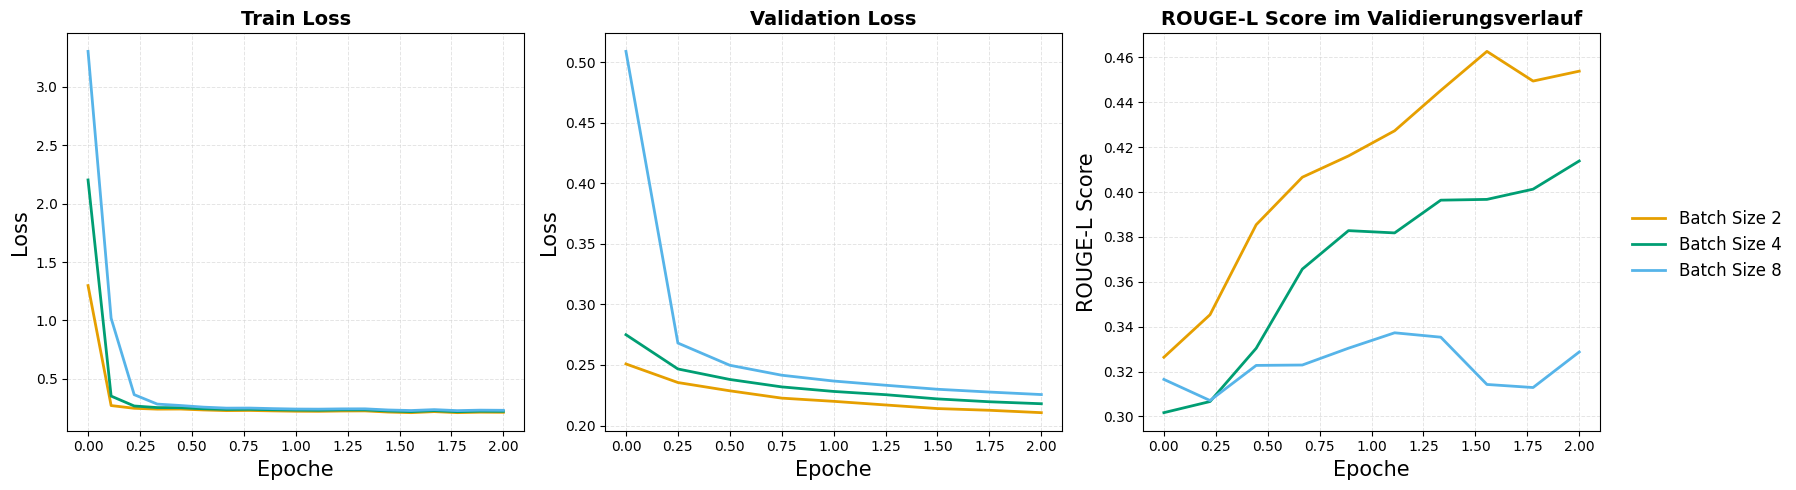

In [3]:
# Farben für alle Plots
colors = ["#E69F00", "#009E73", "#56B4E9"]

# Daten: Train Loss 
data_train_bs2 = pd.read_csv('../../docs/learning_loss_qwen/train_loss_bs2.csv')
data_train_bs4 = pd.read_csv('../../docs/learning_loss_qwen/train_loss_bs4.csv')
data_train_bs8 = pd.read_csv('../../docs/learning_loss_qwen/train_loss_bs8.csv')
epoch_progress_train = np.linspace(0, 2.0, 19)

# Daten Eval Loss
data_eval_bs2 = pd.read_csv('../../docs/learning_loss_qwen/eval_loss_bs2.csv')
data_eval_bs4 = pd.read_csv('../../docs/learning_loss_qwen/eval_loss_bs4.csv')
data_eval_bs8 = pd.read_csv('../../docs/learning_loss_qwen/eval_loss_bs8.csv')
num_points_eval = len(data_eval_bs2)
epoch_progress_eval = np.linspace(0, 2.0, num_points_eval)

#  ROUGE-L über den Traingsverluaf
files = {
    'bs2': '../../docs/qwen/results_all_checkpoints_bs2.csv',
    'bs4': '../../docs/qwen/results_all_checkpoints_bs4.csv',
    'bs8': '../../docs/qwen/results_all_checkpoints_bs8.csv'
}

rouge_scores = {}
for label, path in files.items():
    data = pd.read_csv(path)
    data['correct_answer'] = data['correct_answer'].apply(normalize_answer)
    data['model_output'] = data['model_output'].apply(normalize_answer)
    data['rouge_l'] = data.apply(lambda row: rouge_l(row['correct_answer'], row['model_output']), axis=1)
    model_summary = data.groupby('model')['rouge_l'].mean().reset_index()
    model_summary['checkpoint_num'] = model_summary['model'].str.extract(r'(\d+)').astype(int)
    model_summary = model_summary.sort_values('checkpoint_num')
    rouge_scores[label] = model_summary['rouge_l'].values
    num_points = len(model_summary)
    epoch_progress_rouge = np.linspace(0, 2.0, num_points)


fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# Train Loss
axes[0].plot(epoch_progress_train, data_train_bs2['Value'], color=colors[0], linewidth=2)
axes[0].plot(epoch_progress_train, data_train_bs4['Value'], color=colors[1], linewidth=2)
axes[0].plot(epoch_progress_train, data_train_bs8['Value'], color=colors[2], linewidth=2)
axes[0].set_title('Train Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoche', fontsize=15)
axes[0].set_ylabel('Loss', fontsize=15)
axes[0].set_xticks([i * 0.25 for i in range(9)])
axes[0].grid(True, color='lightgray', linestyle='--', linewidth=0.7, alpha=0.6)

# Eval Loss
axes[1].plot(epoch_progress_eval, data_eval_bs2['Value'], color=colors[0], linewidth=2)
axes[1].plot(epoch_progress_eval, data_eval_bs4['Value'], color=colors[1], linewidth=2)
axes[1].plot(epoch_progress_eval, data_eval_bs8['Value'], color=colors[2], linewidth=2)
axes[1].set_title('Validation Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoche', fontsize=15)
axes[1].set_ylabel('Loss', fontsize=15)
axes[1].set_xticks([i * 0.25 for i in range(9)])
axes[1].grid(True, color='lightgray', linestyle='--', linewidth=0.7, alpha=0.6)

# ROUGE-L
axes[2].plot(epoch_progress_rouge, rouge_scores['bs2'], color=colors[0], linewidth=2)
axes[2].plot(epoch_progress_rouge, rouge_scores['bs4'], color=colors[1], linewidth=2)
axes[2].plot(epoch_progress_rouge, rouge_scores['bs8'], color=colors[2], linewidth=2)
axes[2].set_title('ROUGE-L Score im Validierungsverlauf', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Epoche', fontsize=15)
axes[2].set_ylabel('ROUGE-L Score', fontsize=15)
axes[2].set_xticks([i * 0.25 for i in range(9)])
axes[2].grid(True, color='lightgray', linestyle='--', linewidth=0.7, alpha=0.6)

# Nur einmal Legende ganz rechts
lines_labels = [axes[0].get_lines()[0], axes[0].get_lines()[1], axes[0].get_lines()[2]]
labels = ['Batch Size 2', 'Batch Size 4', 'Batch Size 8']
fig.legend(lines_labels, labels, loc='center right', frameon=False, fontsize=12)

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.show()


# Nur für Batchsize 2

In [ ]:
# gelbe Farbe
color_bs2 = "#E69F00"

# nur BS2
data_train_bs2 = pd.read_csv('../../docs/learning_loss_qwen/train_loss_bs2.csv')
epoch_progress_train = np.linspace(0, 2.0, 19)

data_eval_bs2 = pd.read_csv('../../docs/learning_loss_qwen/eval_loss_bs2.csv')
num_points_eval = len(data_eval_bs2)
epoch_progress_eval = np.linspace(0, 2.0, num_points_eval)

data_rouge = pd.read_csv('../../docs/qwen/results_all_checkpoints_bs2.csv')
data_rouge['correct_answer'] = data_rouge['correct_answer'].apply(normalize_answer)
data_rouge['model_output'] = data_rouge['model_output'].apply(normalize_answer)
data_rouge['rouge_l'] = data_rouge.apply(lambda row: rouge_l(row['correct_answer'], row['model_output']), axis=1)
model_summary = data_rouge.groupby('model')['rouge_l'].mean().reset_index()
model_summary['checkpoint_num'] = model_summary['model'].str.extract(r'(\d+)').astype(int)
model_summary = model_summary.sort_values('checkpoint_num')
rouge_bs2 = model_summary['rouge_l'].values
num_points = len(model_summary)
epoch_progress_rouge = np.linspace(0, 2.0, num_points)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

axes[0].plot(epoch_progress_train, data_train_bs2['Value'], color=color_bs2, linewidth=2)
axes[0].set_title('Train Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoche', fontsize=13)
axes[0].set_ylabel('Loss', fontsize=13)
axes[0].set_xticks([i * 0.25 for i in range(9)])
axes[0].grid(True, color='lightgray', linestyle='--', linewidth=0.7, alpha=0.6)

axes[1].plot(epoch_progress_eval, data_eval_bs2['Value'], color=color_bs2, linewidth=2)
axes[1].set_title('Validation Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoche', fontsize=13)
axes[1].set_ylabel('Loss', fontsize=13)
axes[1].set_xticks([i * 0.25 for i in range(9)])
axes[1].grid(True, color='lightgray', linestyle='--', linewidth=0.7, alpha=0.6)

axes[2].plot(epoch_progress_rouge, rouge_bs2, color=color_bs2, linewidth=2)
axes[2].set_title('ROUGE-L Score im Validierungsverlauf', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Epoche', fontsize=13)
axes[2].set_ylabel('ROUGE-L Score', fontsize=13)
axes[2].set_xticks([i * 0.25 for i in range(9)])
axes[2].grid(True, color='lightgray', linestyle='--', linewidth=0.7, alpha=0.6)

plt.tight_layout()
plt.show()
